In [118]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
pd.set_option("display.max_colwidth", None)

In [49]:
df = pd.read_csv("/workspaces/erp_programme_updates/data/final_for_analysis.csv")

In [120]:
#output folder for visuals 
output_dir = "/workspaces/erp_programme_updates/analysis_outputs"
os.makedirs(output_dir, exist_ok=True)

In [50]:
df.head()

,id,text_x,text_preprocessed,topic_id,topic_label,newsletter_number,date,link,domain,platform,text_y,project,key_person,output_type
0,237938bb-bac2-4977-8b83-b12f02c37478,"Poorer pupils do worse at school – here's how to reduce the attainment gap Stephen Gorard writes for The Conversation on closing the attainment gap, specifically by looking at 'spread(ing) out the most disadvantaged students between schools' and better calibrating the funding to follow the most disadvantaged pupils.",poor pupil bad school here attainment gap conversation attainment gap disadvantaged student school funding disadvantaged pupil,3,Children’s Rights & Participation,2,2023-07-16,https://theconversation.com/poorer-pupils-do-worse-at-school-heres-how-to-reduce-the-attainment-gap-205535,theconversation.com,conversation,"Poorer pupils do worse at school – here's how to reduce the attainment gap Stephen Gorard writes for The Conversation on closing the attainment gap, specifically by looking at 'spread(ing) out the most disadvantaged students between schools' and better calibrating the funding to follow the most disadvantaged pupils.",Recruitment and retention of ethnic minority teachers,Stephen Gorard,media
1,e1f9ff04-4b3a-48da-b7db-82a12c2eb364,A three-part series on leadership from Toby Greany and team on TES: Part 1: Headteacher recruitment crisis: 5 tips for action,threepart series leadership team headteacher recruitment crisis tip action,2,Knowledge Exchange & Briefings,2,2023-07-16,https://www.tes.com/magazine/leadership/staff-management/headteacher-recruitment-crisis-applications,www.tes.com,tes,A three-part series on leadership from Toby Greany and team on TES: Part 1: Headteacher recruitment crisis: 5 tips for action,Sustainable school leadership,Toby Greany,media
2,a414d421-d953-4300-9fdd-f7b8e081912d,"Teacher recruitment, retention and development - rethinking policy and practice priorities seminar – 3 July 2023 Inaugural event in the 'What Matters in education?' series Blog post on the topic - Looking at teacher recruitment and retention in a new light",teacher recruitment retention development policy practice priority seminar july inaugural event education series blog post topic teacher recruitment retention new light,2,Knowledge Exchange & Briefings,3,2023-07-20,https://blogs.ucl.ac.uk/ioe/2023/06/27/looking-at-teacher-recruitment-and-retention-in-a-new-light,blogs.ucl.ac.uk,ucl_blog,"Teacher recruitment, retention and development - rethinking policy and practice priorities seminar – 3 July 2023 Inaugural event in the 'What Matters in education?' series Blog post on the topic - Looking at teacher recruitment and retention in a new light",Education Research Programme,NaN,event
3,a6c9957e-6707-426c-831e-a5709b4152e3,Teaching for Digital Citizenship Delphi conference View the recording of David Lundie's event (held on May 22). BERA membership required to access. https://www.bera.ac.uk/media/teaching-for-digital-citizenship-may2023,digital citizenship delphi conference view recording lundie event bera membership access,4,Teacher Recruitment & Retention,3,2023-07-20,https://www.bera.ac.uk/media/teaching-for-digital-citizenship-may2023,www.bera.ac.uk,bera,Teaching for Digital Citizenship Delphi conference View the recording of David Lundie's event (held on May 22). BERA membership required to access. https://www.bera.ac.uk/media/teaching-for-digital-citizenship-may2023,Teaching for digital citizenship,David Lundie,event
4,1d1ad500-8555-4988-8d4a-51a5a3d18566,My corona*: listening to children in corona times Resource shared via Sarah Chicken's website - https://childrens-participation.org/ This research paper brings together three of the young journalists who worked on The Corona Times Journal to reflect on their experiences of being involved in the project. https://www.tandfonline.com/doi/epdf/10.1080/13642987.2022.2061954?needAccess=true&role=button,corona child corona times resource chicken website research paper young journalist corona time

In [51]:
df.columns

Index(['id', 'text_x', 'text_preprocessed', 'topic_id', 'topic_label',
       'newsletter_number', 'date', 'link', 'domain', 'platform', 'text_y',
       'project', 'key_person', 'output_type'],
      dtype='object')

In [52]:
# Total newsletter items 
total_items = len(df)
print("Total updates from the programme:", total_items)


Total updates from the programme: 118


# Function to save plots 

In [115]:
def save_plot(filename):
    """Save the current Matplotlib plot to your analysis_outputs folder."""
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    plt.close()  # prevents duplicate showing
    print(f"Saved plot: {filepath}")

def save_table(df, filename):
    """Save any DataFrame as CSV or Excel to the analysis_outputs folder."""
    filepath = os.path.join(output_dir, filename)
    if filename.endswith(".csv"):
        df.to_csv(filepath, index=False)
    else:
        df.to_excel(filepath, index=False)
    print(f"Saved table: {filepath}")


# Outputs per year 

In [54]:
df["date"] = pd.to_datetime(df["date"])  # if not already done
df["year"] = df["date"].dt.year

In [55]:
#outputs per year 
outputs_per_year = df["year"].value_counts().sort_index()
print(outputs_per_year)

year
2023    26
2024    48
2025    44
Name: count, dtype: int64


In [152]:
# Visual style
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10, 5))
sns.barplot(
    x=outputs_per_year.index.astype(str), 
    y=outputs_per_year.values,
    palette="viridis",
    width=0.35   # <-- makes bars thinner
)

plt.title("Programme updates per year", fontsize=18, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Outputs", fontsize=14)

# Value labels above bars
for i, value in enumerate(outputs_per_year.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12)

plt.tight_layout()
save_plot("updates_per_year_bar.png")
plt.show()


/tmp/ipykernel_243392/3067131250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/updates_per_year_bar.png


In [153]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))

# 🔥 FIX: Convert years to strings so they plot as categories
x_values = outputs_per_year.index.astype(str)

sns.lineplot(
    x=x_values,
    y=outputs_per_year.values,
    marker="o",
    linewidth=3,
    color=sns.color_palette("viridis")[3]
)

plt.title("Programme updates per year", fontsize=18, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Outputs", fontsize=14)

# Add value labels
for x, y in zip(x_values, outputs_per_year.values):
    plt.text(x, y + 0.3, str(y), ha="center", fontsize=12)

plt.tight_layout()
save_plot("updates_per_year_line.png")
plt.show()



Saved plot: /workspaces/erp_programme_updates/analysis_outputs/updates_per_year_line.png


# Cross project outputs 

In [126]:
df.project.value_counts()

project
Education Research Programme                             29
Recruitment and retention of ethnic minority teachers    23
Sustainable school leadership                            15
Embedding children's participation rights in Wales       13
Cross-project                                            11
Towards equity-focused approaches to EdTech               8
Teaching for digital citizenship                          7
Rethinking teacher recruitment (STEM)                     6
Decentring the 'resilient teacher'                        2
Digital empowerment in language teaching (DELTEA)         2
Enhancing teacher agency with technology                  2
Name: count, dtype: int64

In [154]:
project_counts = df["project"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=project_counts.values,
    y=project_counts.index,
    palette="viridis",
    width=0.5
)

plt.title("Outputs by Project", fontsize=18, weight="bold")
plt.xlabel("Number of Outputs", fontsize=14)
plt.ylabel("Project", fontsize=14)

# Add value labels
for i, v in enumerate(project_counts.values):
    plt.text(v + 0.2, i, str(v), fontsize=12)

plt.tight_layout()

save_plot("outputs_per_project.png")
plt.show()


/tmp/ipykernel_243392/1606227230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/outputs_per_project.png


In [59]:
df["is_cross_project"] = df["project"] == "Cross-project"

In [155]:
# Count cross-project outputs per year
collab_per_year = df.groupby("year")["is_cross_project"].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))

sns.barplot(
    x=collab_per_year.index.astype(str),
    y=collab_per_year.values,
    palette="viridis",
    width=0.35   # <-- makes bars thinner
)

plt.title("Cross-Project Collaboration Outputs per Year", fontsize=18, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Collaborative Outputs", fontsize=14)

# Add labels
for i, val in enumerate(collab_per_year.values):
    plt.text(i, val + 0.3, str(val), ha="center", fontsize=12)

plt.tight_layout()

save_plot("cross_project_collab.png")
plt.show()


/tmp/ipykernel_243392/3467059001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/cross_project_collab.png


In [61]:
cross_df = df[df["is_cross_project"]]
cross_project_table = cross_df[["year", "text_x"]].sort_values("year")
cross_project_table

,year,text_x
17,2023,"ERP researcher meeting We held the first ERP researcher meeting on the 19 October 2023, which provided the opportunity for researchers from the different ERP funded projects to come together and discuss their ongoing research. The aim is to provide a networking opportunity and to share issues as they arise, as well as to build community across the Programme. We had two interesting presentations: By Dr. James Craske at University of East Anglia based on his PhD project. James is working on the Enhancing teacher agency with technology: Creating an ecological model through a place-based study of teaching and learning project with Professor John Gordon. By Dr. Rachel France at University College London on her review of partnership working in education in north America. Rachel is part of the core UCL team with Programme Director Professor Gemma Moss. James' presentation showed how policy changed practice in the classroom, while Rachel's provided a possible solution to how research, policy and practice can work more closely together to produce change. The next ERP researcher meeting will be held in early December. To sign up to the mailing list, please email elizabeth.hudson@ucl.ac.uk"
58,2024,"BERJ Call for Papers - Making teaching an attractive profession: challenges and opportunities This special issue of BERJ is guest edited by Beng Huat See, Gemma Moss, Robert Klassen, Mark Ledger, Sophie Thompson-Lee, and Rebecca Snell. The call invites research papers and commentaries from scholars working worldwide to provide insight into the reasons why the teaching profession has faced such difficulties in recruiting and retaining staff; and what can be done about it. Please click on the link to see how to submit an abstract."
62,2024,"ERP projects at BERA-WERA 2024 We were delighted to see so many presentations at BERA from the ERP projects. One symposium, Making teaching and leadership more attractive: emerging findings from the ESRC Education Research Programme, featured contributions from four of the nine projects. ERP project papers presented elsewhere at the conference included Teaching for digital citizenship; Teach and Tech: Teacher agency in primary classrooms; Knowledge Flows in Education: Revisiting how policy research and practice interact in the 4 nations and jurisdictions of the UK; Local Learning Landscapes: conceptualising place-based professional learning for teachers; and Human Rights Education: Teachers' perceptions about the value of children's participation. Contact Elizabeth.hudson@ucl.ac.uk if you would like copies of the slides."
96,2025,"19 May 2025, 5:30 pm–7:00 pm. Speakers Toby Greany, Nottingham University Steph Ainsworth, Manchester Metropolitan University Respondents Qing Gu, UCL Stephen Betts, Chief Executive of Learn Sheffield Mary Lowery, Head of School Improvement (Post-primary and Special Education, Locality East), Education Authority Northern Ireland In this latest edition of the What matters in education? panel discussion, Toby Greany and Steph Ainsworth will discuss their research into developing place-based approaches to school leadership development and tools that schools can use to improve teacher resilience and retention. An opportunity to reflect on the implications of their emerging findings for education policy and practice will follow, in conversation with Qing Gu, Professor of Leadership in Education at UCL; Stephen Betts, Chief Executive of Learn Sheffield and Mary Lowery Head of School Improvement (Post-primary and Special Education, Locality East), Education Authority Northern Ireland. Book your place A reminder that the ESRC Education Research Programme ECR Network cordially invites you for a special open session, featuring a panel of speakers on AI and the implications for teaching and learning in schools."
103,2025,"Event: Developing pedagogies in early years and primary school settings: opportunities and challenges in different policy contexts. 26 June 2025, 5:30 

# Outputs by theme 

In [62]:
# Count outputs per theme
theme_counts = df["topic_label"].value_counts().sort_values(ascending=False)

In [156]:
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(
    x=theme_counts.values,
    y=theme_counts.index,
    palette="viridis"
)

plt.title("Outputs by Theme", fontsize=18, weight="bold")
plt.xlabel("Number of Outputs", fontsize=14)
plt.ylabel("Theme", fontsize=14)

# Add value labels
for i, v in enumerate(theme_counts.values):
    plt.text(v + 0.3, i, str(v), fontsize=12)

plt.tight_layout()

save_plot("outputs_by_theme.png")

plt.show()



/tmp/ipykernel_243392/4089591861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/outputs_by_theme.png


In [64]:
# topics per year 
themes_over_time = df.groupby(["year", "topic_label"]).size().reset_index(name="count")

In [157]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=themes_over_time,
    x="year",
    y="count",
    hue="topic_label",
    marker="o",
    linewidth=2.5,
    palette="tab20"
)

plt.title("Themes Over Time", fontsize=20, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Outputs", fontsize=14)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

save_plot("outputs_theme_year.png")
plt.show()


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/outputs_theme_year.png


In [67]:
# Project x theme 
project_theme_matrix = df.pivot_table(
    index="project",
    columns="topic_label",
    values="text_x",
    aggfunc="count",
    fill_value=0
)

In [158]:
plt.figure(figsize=(16, 10))
sns.set_theme(style="white")

sns.heatmap(
    project_theme_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor="white",
    annot=True,
    fmt="d",
    cbar_kws={"label": "Number of Outputs"}
)

plt.title("Project × Theme Matrix", fontsize=20, weight="bold")
plt.xlabel("Theme", fontsize=14)
plt.ylabel("Project", fontsize=14)

plt.tight_layout()
save_plot("heatmap_project_themes.png")
plt.show()



Saved plot: /workspaces/erp_programme_updates/analysis_outputs/heatmap_project_themes.png


# Project Level Analysis 

In [69]:
project_counts = df["project"].value_counts().sort_values(ascending=False)
project_counts

project
Education Research Programme                             29
Recruitment and retention of ethnic minority teachers    23
Sustainable school leadership                            15
Embedding children's participation rights in Wales       13
Cross-project                                            11
Towards equity-focused approaches to EdTech               8
Teaching for digital citizenship                          7
Rethinking teacher recruitment (STEM)                     6
Decentring the 'resilient teacher'                        2
Digital empowerment in language teaching (DELTEA)         2
Enhancing teacher agency with technology                  2
Name: count, dtype: int64

/tmp/ipykernel_243392/1015951288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


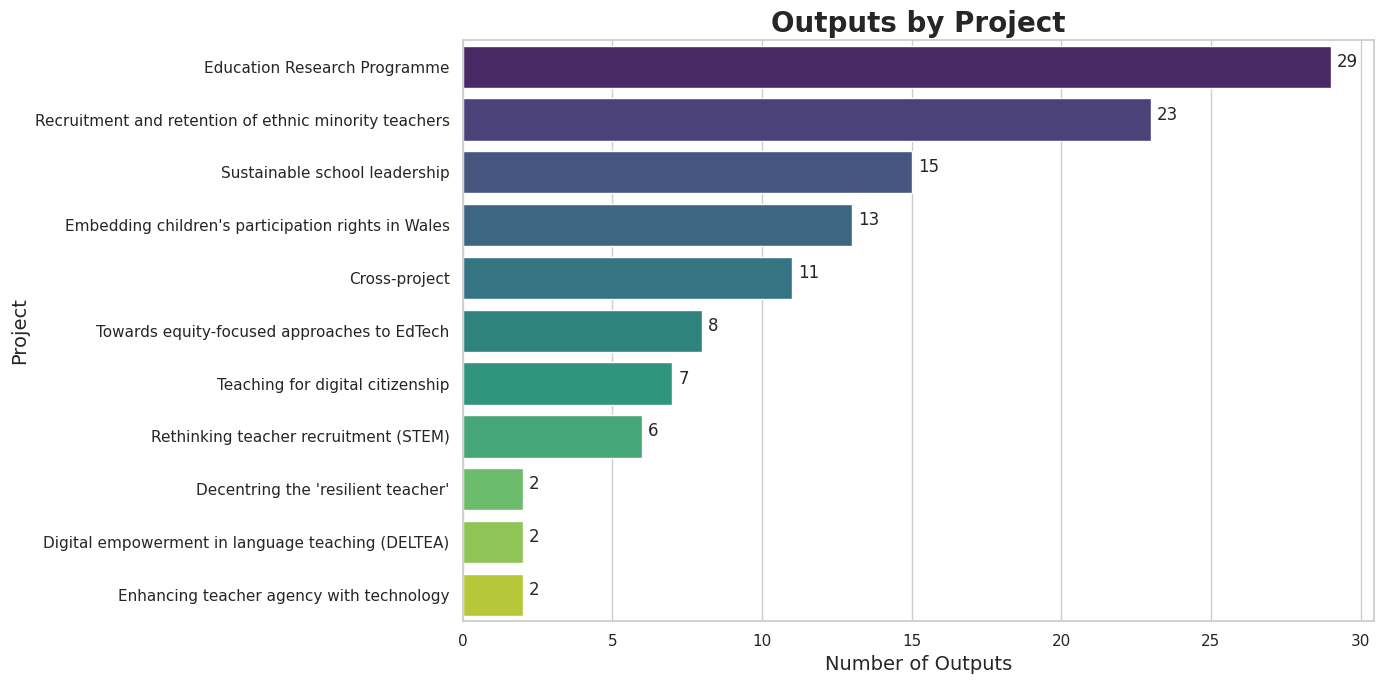

In [70]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.barplot(
    x=project_counts.values,
    y=project_counts.index,
    palette="viridis"
)

plt.title("Outputs by Project", fontsize=20, weight="bold")
plt.xlabel("Number of Outputs", fontsize=14)
plt.ylabel("Project", fontsize=14)

# Add value labels
for i, v in enumerate(project_counts.values):
    plt.text(v + 0.2, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()


In [71]:
df["date"] = pd.to_datetime(df["date"])
df["year_month"] = df["date"].dt.to_period("M")

In [75]:
activity["year_month_dt"] = activity["year_month"].dt.to_timestamp()

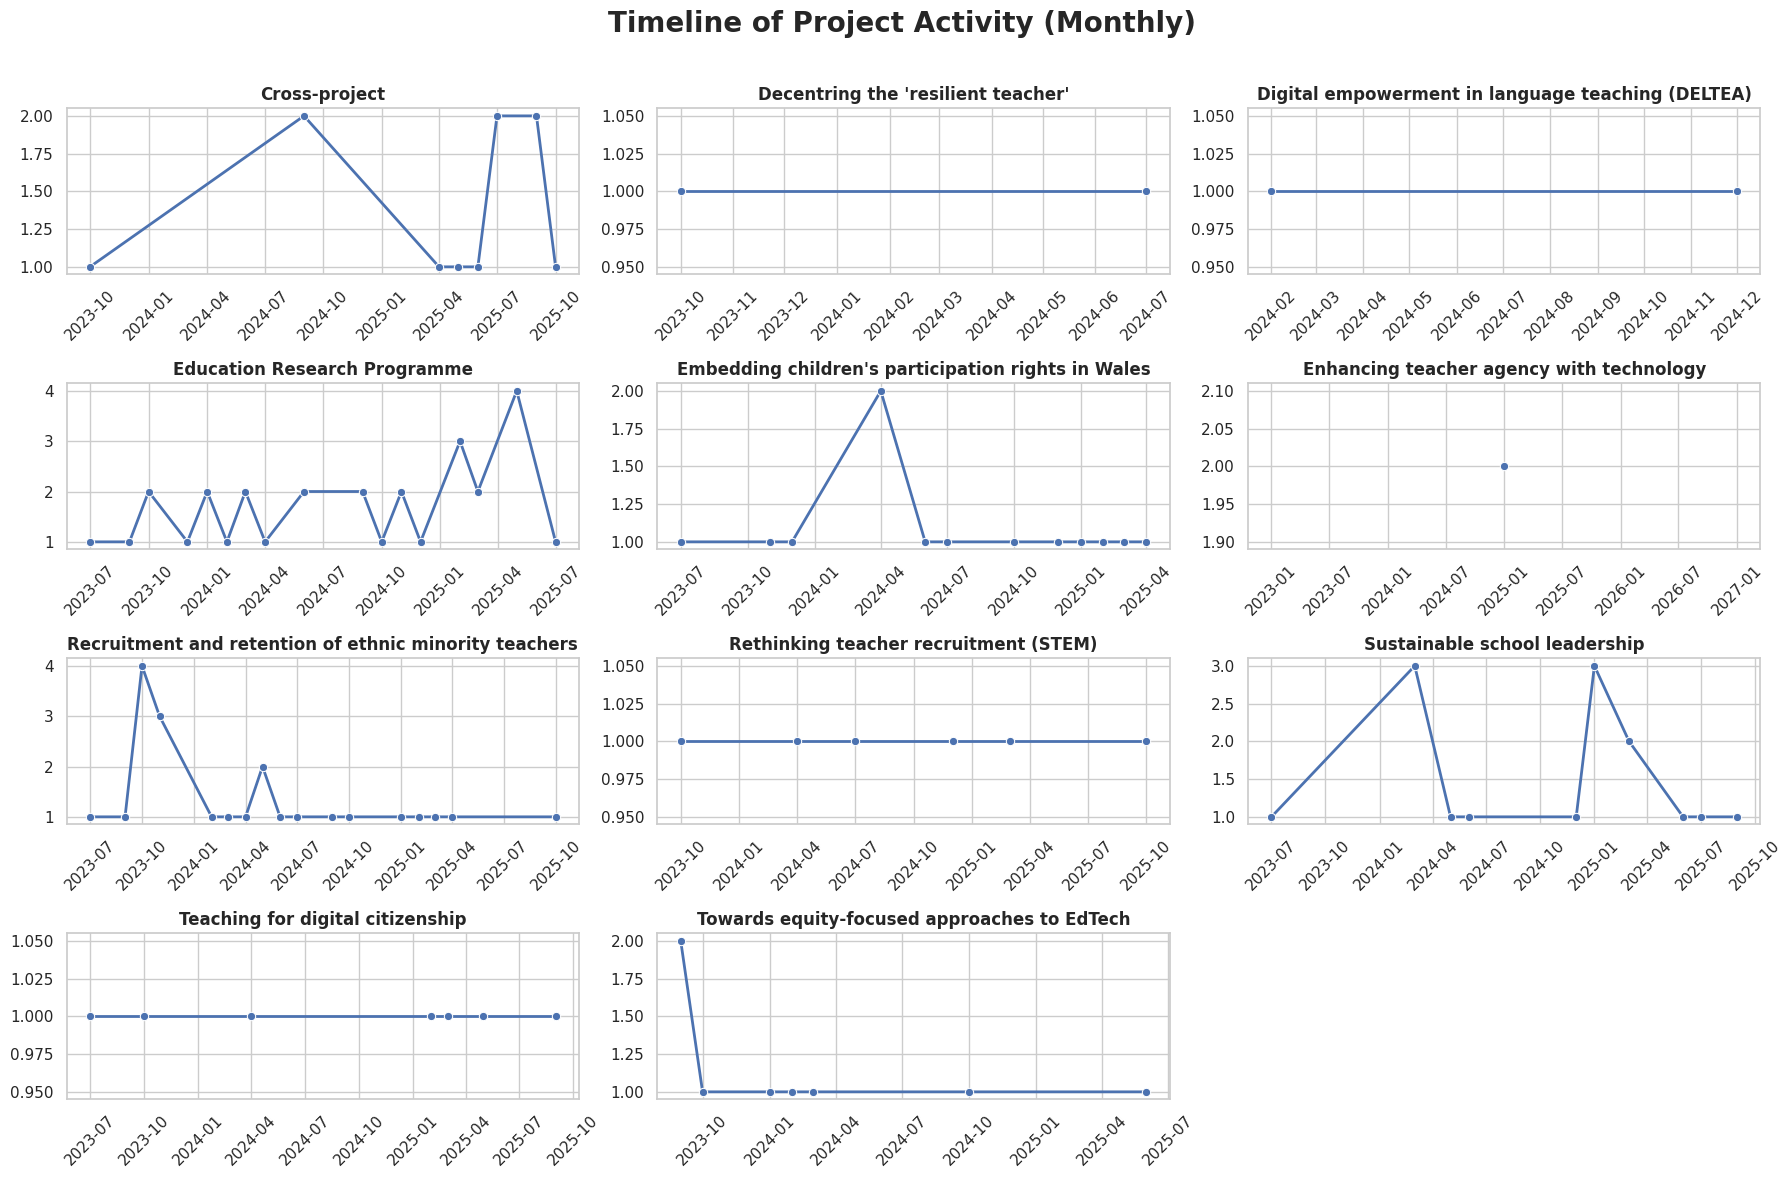

In [76]:
projects = sorted(df["project"].unique())

sns.set_theme(style="whitegrid")

ncols = 3
nrows = -(-len(projects) // ncols)  # ceiling division

plt.figure(figsize=(18, nrows * 3))

for i, project in enumerate(projects, 1):
    plt.subplot(nrows, ncols, i)

    proj_data = activity[activity["project"] == project]

    sns.lineplot(
        data=proj_data,
        x="year_month_dt",
        y="count",
        marker="o",
        linewidth=2
    )

    plt.title(project, fontsize=12, weight="bold")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=45)

plt.suptitle("Timeline of Project Activity (Monthly)", fontsize=20, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# outputs by platform 

In [77]:
platform_counts = df["platform"].value_counts().sort_values(ascending=False)
platform_counts

platform
ucl                                               18
conversation                                      11
ucl_mediacentral                                   6
edtech_oii                                         5
undefined                                          5
bera                                               5
tes                                                4
bera_journals                                      4
childrens_participation_in_schools                 3
ucl_blog                                           3
durham                                             3
erp_news                                           3
chartered_college_of_teaching                      2
schools_week                                       2
sustainable_school_leadership                      2
sage_journals                                      2
ucl_discovery                                      2
guardian                                           2
microsoft_teams_events               

/tmp/ipykernel_243392/1329058479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


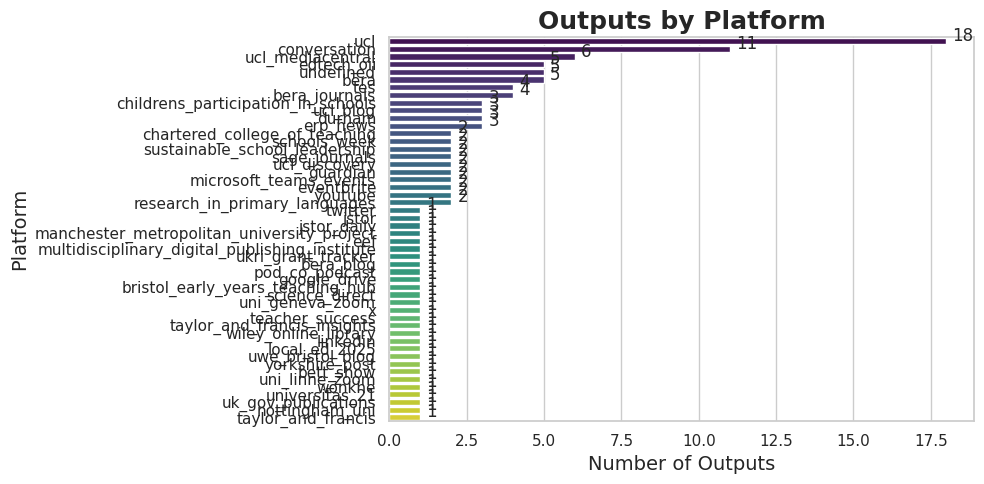

In [78]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.barplot(
    x=platform_counts.values,
    y=platform_counts.index,
    palette="viridis"
)

plt.title("Outputs by Platform", fontsize=18, weight="bold")
plt.xlabel("Number of Outputs", fontsize=14)
plt.ylabel("Platform", fontsize=14)

for i, v in enumerate(platform_counts.values):
    plt.text(v + 0.2, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

# outputs by output type 

In [79]:
output_type_counts = df["output_type"].value_counts().sort_values(ascending=False)
output_type_counts

output_type
event                45
publication          34
media                22
blog/vlog            12
research_progress     4
policy_engagement     1
Name: count, dtype: int64

In [159]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    x=output_type_counts.values,
    y=output_type_counts.index,
    palette="viridis"
)

plt.title("Outputs by Output Type", fontsize=18, weight="bold")
plt.xlabel("Number of Outputs", fontsize=14)
plt.ylabel("Output Type", fontsize=14)

# Add labels
for i, v in enumerate(output_type_counts.values):
    plt.text(v + 0.3, i, str(v), fontsize=12)

plt.tight_layout()
save_plot("output_types.png")
plt.show()



/tmp/ipykernel_243392/3887624120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/output_types.png


In [166]:
proj_output_type_table = (
    df.pivot_table(
        index="project",
        columns="output_type",
        values="text_x",    # or text_x depending on your df
        aggfunc="count",
        fill_value=0
    )
)
save_table(proj_output_type_table, "output_type_per_project.xlsx")
proj_output_type_table

Saved table: /workspaces/erp_programme_updates/analysis_outputs/output_type_per_project.xlsx


output_type,blog/vlog,event,media,policy_engagement,publication,research_progress
project,,,,,,
Cross-project,0,8,1,1,1,0
Decentring the 'resilient teacher',1,0,1,0,0,0
Digital empowerment in language teaching (DELTEA),1,1,0,0,0,0
Education Research Programme,2,15,1,0,11,0
Embedding children's participation rights in Wales,3,5,0,0,5,0
Enhancing teacher agency with technology,0,2,0,0,0,0
Recruitment and retention of ethnic minority teachers,0,5,12,0,5,1
Rethinking teacher recruitment (STEM),1,0,0,0,4,1
Sustainable school leadership,1,2,6,0,4,2


In [167]:
outputtype_theme_table = (
    df.pivot_table(
        index="topic_label",      # THEME
        columns="output_type",    # OUTPUT TYPE
        values="text_preprocessed",   # or text_x / text depending on your column
        aggfunc="count",
        fill_value=0
    )
)

outputtype_theme_table


output_type,blog/vlog,event,media,policy_engagement,publication,research_progress
topic_label,,,,,,
Children’s Rights & Participation,2,5,13,0,6,3
Digital Citizenship & Technology,1,5,2,0,0,0
Education Research & Policy Events,2,1,0,0,8,0
Knowledge Exchange & Briefings,2,4,3,0,3,1
School Leadership & Sustainability,0,4,2,1,9,0
Teacher Recruitment & Retention,4,12,1,0,1,0


# keywords 

In [84]:
df.columns

Index(['id', 'text_x', 'text_preprocessed', 'topic_id', 'topic_label',
       'newsletter_number', 'date', 'link', 'domain', 'platform', 'text_y',
       'project', 'key_person', 'output_type', 'year', 'is_cross_project',
       'year_month'],
      dtype='object')

In [89]:
#join all the text into one big string 
text_combined = " ".join(df["text_preprocessed"].astype(str).tolist())

In [90]:
# Generate word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="viridis",
    max_words=200,
    collocations=False
).generate(text_combined)

In [161]:
# Plot
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Preprocessed Text", fontsize=20, weight="bold")

save_plot("word_cloud_all.png")

plt.show()


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/word_cloud_all.png


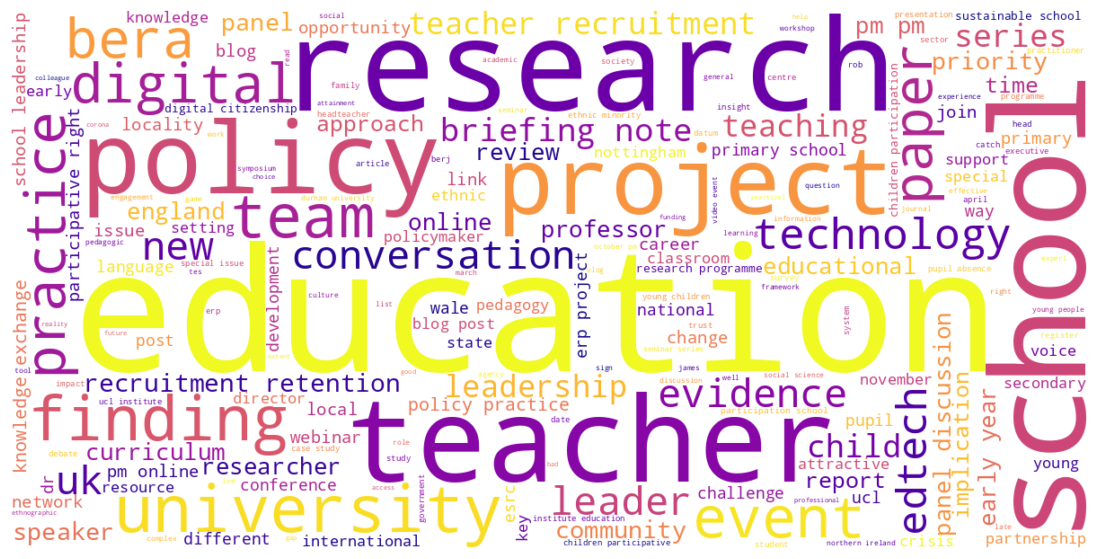

In [143]:
text = " ".join(df["text_preprocessed"].astype(str))

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="plasma"
).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [162]:
projects = df["project"].unique()

for project in projects:
    subset = df[df["project"] == project]
    text = " ".join(subset["text_preprocessed"].astype(str))

    wc = WordCloud(width=1000, height=600, background_color="white", colormap="Dark2").generate(text)

    plt.figure(figsize=(12,6))
    plt.title(f"Word Cloud – {project}", fontsize=18)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
      # 🔥 Save the plot
    safe_name = project.replace(" ", "_").replace("/", "_")
    save_plot(f"wordcloud_{safe_name}.png")
    plt.show()

  


Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Recruitment_and_retention_of_ethnic_minority_teachers.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Sustainable_school_leadership.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Education_Research_Programme.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Teaching_for_digital_citizenship.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Embedding_children's_participation_rights_in_Wales.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Towards_equity-focused_approaches_to_EdTech.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Decentring_the_'resilient_teacher'.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Cross-project.png
Saved plot: /workspaces/erp_programme_updates/analysis_outputs/wordcloud_Rethinking_teacher_re

# Final Table 

In [168]:
# --- 1. Total Outputs ---
total_outputs = df.groupby("project").size().rename("total_outputs")

# --- 2. Active Years ---
active_years = df.groupby("project")["year"].nunique().rename("active_years")

# --- 3. Platforms Used ---
platforms_used = df.groupby("project")["platform"].nunique().rename("platforms_used")

# --- 4. Topic Diversity (unique topic labels) ---
topic_diversity = df.groupby("project")["topic_label"].nunique().rename("topic_diversity")

# --- 5. Key People Count (unique key persons per project) ---
key_people = df.groupby("project")["key_person"].nunique().rename("key_people")

# --- 6. Cross-Project Outputs ---
cross_project_counts = (
    df.assign(is_cross = (df["project"] == "Cross-project"))
      .groupby("project")["is_cross"]
      .sum()
      .rename("cross_project_outputs")
)

# --- 7. Common Words (Top 5 words per project) ---
cv = CountVectorizer(stop_words="english")

def get_top_words(texts, n=5):
    X = cv.fit_transform(texts)
    counts = X.sum(axis=0).A1
    vocab = cv.get_feature_names_out()
    freq = list(zip(vocab, counts))
    freq_sorted = sorted(freq, key=lambda x: x[1], reverse=True)
    return ", ".join([w for w, c in freq_sorted[:n]])

common_words = (
    df.groupby("project")["text_preprocessed"]
      .apply(lambda x: get_top_words(x.dropna().astype(str).tolist(), n=5))
      .rename("common_words")
)

# --- 8. Most Frequent Theme per Project ---
most_freq_theme = (
    df.groupby("project")["topic_label"]
      .agg(lambda x: x.value_counts().idxmax())
      .rename("most_frequent_theme")
)

# --- Combine all indicators ---
indicator_table = pd.concat([
    total_outputs,
    active_years,
    platforms_used,
    topic_diversity,
    key_people,
    cross_project_counts,
    common_words,
    most_freq_theme
], axis=1)

indicator_table.reset_index(inplace=True)
indicator_table

,project,total_outputs,active_years,platforms_used,topic_diversity,key_people,cross_project_outputs,common_words,most_frequent_theme
0,Cross-project,11,3,6,3,1,11,"education, project, research, teacher, university",School Leadership & Sustainability
1,Decentring the 'resilient teacher',2,2,2,2,2,0,"crisis, early, school, teacher, tts",Knowledge Exchange & Briefings
2,Digital empowerment in language teaching (DELTEA),2,1,1,2,1,0,"digital, language, teacher, tool, association",Digital Citizenship & Technology
3,Education Research Programme,29,3,11,5,3,0,"education, research, policy, panel, briefing",Education Research & Policy Events
4,Embedding children's participation rights in Wales,13,3,8,3,4,0,"children, school, right, young, participative",Teacher Recruitment & Retention
5,Enhancing teacher agency with technology,2,1,2,1,0,0,"technology, digital, edtech, education, teacher",Teacher Recruitment & Retention
6,Recruitment and retention of ethnic minority teachers,23,3,12,4,3,0,"school, education, teacher, ethnic, conversation",Children’s Rights & Participation
7,Rethinking teacher recruitment (STEM),6,3,5,2,3,0,"career, teacher, game, paper, recruitment",Knowledge Exchange & Briefings
8,Sustainable school leadership,15,3,10,2,3,0,"school, leadership, leader, research, sustainable",Children’s Rights & Participation
9,Teaching for digital citizenship,7,3,6,2,2,0,"digital, school, education, event, project",Teacher Recruitment & Retention
